In [5]:
## Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import tensorflow as tf
from keras.utils.data_utils import Sequence
import sys
from PIL import *
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os
import numpy as np
#import cv2   
import os
import random
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm

In [3]:
img_width, img_height = 224, 224
IMG_SIZE = 224

In [4]:
CATEGORIES =['no_pneumonia','pneumonia']
train_data = r'C:\Users\Computing\Downloads\data-task1-20220514T173113Z-001\data-task1\data-task1\train'
test_data = r'C:\Users\Computing\Downloads\data-task1-20220514T173113Z-001\data-task1\data-task1\test'
val_data = r'C:\Users\Computing\Downloads\data-task1-20220514T173113Z-001\data-task1\data-task1\val'

def pre_pro(DIRECTORY):

  data = []
  #pre-processing
  for category in CATEGORIES:
        folder = os.path.join(DIRECTORY, category)
        label = CATEGORIES.index(category)
        for img in tqdm(os.listdir(folder)):
            try:
                img_path = os.path.join(folder, img)
                #print(img_path)
                #img_arr = cv2.imread(img_path)
                #img_arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img_arr = cv2.imread(img_path)
                img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
                data.append([img_arr, label])
            except Exception as e:
                 pass
  len(data)

  random.shuffle(data)

  X = []
  Y = []
    
  for features, labels in data:
   X.append(features)
   Y.append(labels)
    

  #X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
  X = np.array(X)
  y = np.array(Y)
  return X, y

In [8]:
X_train,y_train = pre_pro(r'C:\Users\Computing\Downloads\data-task1-20220514T173113Z-001\data-task1\data-task1\train')
X_test,y_test = pre_pro(r'C:\Users\Computing\Downloads\data-task1-20220514T173113Z-001\data-task1\data-task1\test')
X_val,y_val= pre_pro(r'C:\Users\Computing\Downloads\data-task1-20220514T173113Z-001\data-task1\data-task1\val')

100%|████████████████████████████████████████████████████████████████████████████████| 110/110 [00:01<00:00, 69.39it/s]


In [9]:
pickle.dump(X_train, open(r'C:\Users\Computing\Downloads\data-task1-20220514T173113Z-001\data-task1\data-task1\X_train.pkl', 'wb'))
pickle.dump(y_train, open(r'C:\Users\Computing\Downloads\data-task1-20220514T173113Z-001\data-task1\data-task1\y_train.pkl', 'wb'))
pickle.dump(X_test, open(r'C:\Users\Computing\Downloads\data-task1-20220514T173113Z-001\data-task1\data-task1\X_test.pkl', 'wb'))
pickle.dump(y_test, open(r'C:\Users\Computing\Downloads\data-task1-20220514T173113Z-001\data-task1\data-task1\Y_test.pkl', 'wb'))
pickle.dump(X_val, open(r'C:\Users\Computing\Downloads\data-task1-20220514T173113Z-001\data-task1\data-task1\X_val.pkl', 'wb'))
pickle.dump(y_val, open(r'C:\Users\Computing\Downloads\data-task1-20220514T173113Z-001\data-task1\data-task1\y_val.pkl', 'wb'))

In [6]:
import pickle
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import TensorBoard

X_train = pickle.load(open(r'C:\Users\Computing\Downloads\data-task1-20220514T230241Z-001\data-task1\data-task1\X_train.pkl','rb'))
y_train = pickle.load(open(r'C:\Users\Computing\Downloads\data-task1-20220514T230241Z-001\data-task1\data-task1\y_train.pkl','rb'))
X_test = pickle.load(open(r'C:\Users\Computing\Downloads\data-task1-20220514T230241Z-001\data-task1\data-task1\X_test.pkl','rb'))
y_test = pickle.load(open(r'C:\Users\Computing\Downloads\data-task1-20220514T230241Z-001\data-task1\data-task1\Y_test.pkl','rb'))
X_val = pickle.load(open(r'C:\Users\Computing\Downloads\data-task1-20220514T230241Z-001\data-task1\data-task1\X_val.pkl','rb'))
y_val = pickle.load(open(r'C:\Users\Computing\Downloads\data-task1-20220514T230241Z-001\data-task1\data-task1\y_val.pkl','rb'))

In [11]:
!pip3 install imblearn

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1


In [7]:
y_val.shape

(500,)

In [8]:
X_val.shape

(500, 150, 150, 3)

In [13]:
X_trainShape = X_train.shape[1]*X_train.shape[2]*X_train.shape[3]
X_trainFlat = X_train.reshape(X_train.shape[0], X_trainShape)
Y_train = y_train
#from imblearn.under_sampling import RandomUnderSampler
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE 
ros = SMOTE(sampling_strategy='minority')
X_trainRos, Y_trainRos = ros.fit_resample(X_trainFlat, Y_train)
Y_trainRosHot = to_categorical(Y_trainRos, num_classes = 2)
#X_valRos, Y_valRos = ros.fit_resample(X_valFlat, Y_val)
for i in range(len(X_trainRos)):
    height, width, channels = 150,150,3
    X_trainRosReshaped = X_trainRos.reshape(len(X_trainRos),height,width,channels)
Y_trainRosHot = to_categorical(Y_trainRos, num_classes = 2)

X_train = X_trainRosReshaped
y_train = Y_trainRosHot

In [14]:
X_train.shape

(4716, 150, 150, 3)

In [15]:
y_train.shape

(4716, 2)

In [17]:
X_valShape = X_val.shape[1]*X_val.shape[2]*X_val.shape[3]
X_valFlat = X_val.reshape(X_val.shape[0], X_valShape)
Y_val = y_val
from imblearn.over_sampling import SMOTE 
ros = SMOTE(sampling_strategy='minority')
X_valRos, Y_valRos = ros.fit_resample(X_valFlat, Y_val)
Y_valRosHot = to_categorical(Y_valRos, num_classes = 2)
#X_valRos, Y_valRos = ros.fit_resample(X_valFlat, Y_val)
for i in range(len(X_valRos)):
    height, width, channels = 150,150,3
    X_valRosReshaped = X_valRos.reshape(len(X_valRos),height,width,channels)
Y_valRosHot = to_categorical(Y_valRos, num_classes = 2)
X_val = X_valRosReshaped
y_val = Y_valRosHot

In [18]:
X_val.shape

(780, 150, 150, 3)

In [19]:
X_train = X_train/ 255;
X_test = X_test/ 255;
X_val = X_val/ 255;



from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale = 1/244,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rotation_range=10,
        rescale = 1/244,
        width_shift_range=0.2, # horizontal shift
        height_shift_range=0.2, # vertical shift
        zoom_range=0.2, # zoom
        horizontal_flip=True, # horizontal flip
        brightness_range=[0.2,1.2])

val_datagen = ImageDataGenerator(rescale = 1/244,rotation_range=10, # rotation
        width_shift_range=0.2, # horizontal shift
        height_shift_range=0.2, # vertical shift
        zoom_range=0.2, # zoom
        horizontal_flip=True, # horizontal flip
        brightness_range=[0.2,1.2])





In [20]:
train_datagen.fit(X_train)
test_datagen.fit(X_test)
val_datagen.fit(X_val)

In [21]:
import tensorflow
from tensorflow.keras.utils import to_categorical
#y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)
#y_val = to_categorical(y_val, 2)

In [23]:
from keras.layers.pooling import GlobalMaxPooling2D
import keras
from keras.applications.vgg16 import VGG16
model = VGG16(input_shape =(150,150,3) ,weights='imagenet', include_top=False)

for layer in model.layers:
    layer.trainable = False

result = model.output

from keras.layers import BatchNormalization
result = BatchNormalization()(result)
result = Flatten()(result)
# add a fully-connected layer

result = Dense(512, activation='relu')(result)
result = Dropout(0.5)(result)

result = Dense(256, activation='relu')(result)
result = Dropout(0.5)(result)


result = Dense(128, activation='relu')(result)
result = Dropout(0.5)(result)

result = Dense(64, activation='relu')(result)
result = Dropout(0.5)(result)


#result = Dropout(0.5)(result)

# and a fully connected output/classification layer

predictions = Dense(2, activation='sigmoid')(result)
vgg_model = Model(inputs=model.input, outputs=predictions)

from tensorflow.keras.optimizers import SGD
import tensorflow as tf
sgd = tf.optimizers.SGD(lr=1e-4, momentum=0.9)
vgg_model.compile(loss='categorical_crossentropy',optimizer= tf.keras.optimizers.RMSprop(lr=2e-5) ,metrics=['accuracy'])
import tensorflow as tf
#history = vgg_model.fit(X_trainRosReshaped,Y_trainRosHot, validation_data=(X_testRosReshaped, Y_testRosHot), epochs=10, batch_size=32, verbose=1, class_weight=class_weight)
history = vgg_model.fit(X_train,y_train, validation_data=(X_val, y_val), epochs=5, batch_size=32, verbose=1)
#history = vgg_model.fit(train_generator, validation_generator, epochs=5, batch_size=32, verbose=1)
#history = vgg_model.fit_generator(train_generator, validation_data=validation_generator, epochs=5)

Epoch 1/5
148/148 [==============================] - 120s 809ms/step - loss: 0.9495 - accuracy: 0.5712 - val_loss: 0.5697 - val_accuracy: 0.8026
Epoch 2/5
148/148 [==============================] - 122s 822ms/step - loss: 0.7021 - accuracy: 0.6522 - val_loss: 0.4654 - val_accuracy: 0.8000
Epoch 3/5
148/148 [==============================] - 129s 875ms/step - loss: 0.6094 - accuracy: 0.7034 - val_loss: 0.4053 - val_accuracy: 0.8115
Epoch 4/5
148/148 [==============================] - 131s 889ms/step - loss: 0.5439 - accuracy: 0.7345 - val_loss: 0.3806 - val_accuracy: 0.8154
Epoch 5/5
148/148 [==============================] - 124s 842ms/step - loss: 0.5056 - accuracy: 0.7513 - val_loss: 0.3672 - val_accuracy: 0.8231


In [ ]:
model.save(r'/content/drive/MyDrive/data-task1/data-task1/vgg_smote_good_batch.h5')

In [ ]:
from tensorflow import keras
vgg_model = keras.models.load_model(r'/content/drive/MyDrive/data-task1/data-task1/vgg_smote_good_batch.h5')

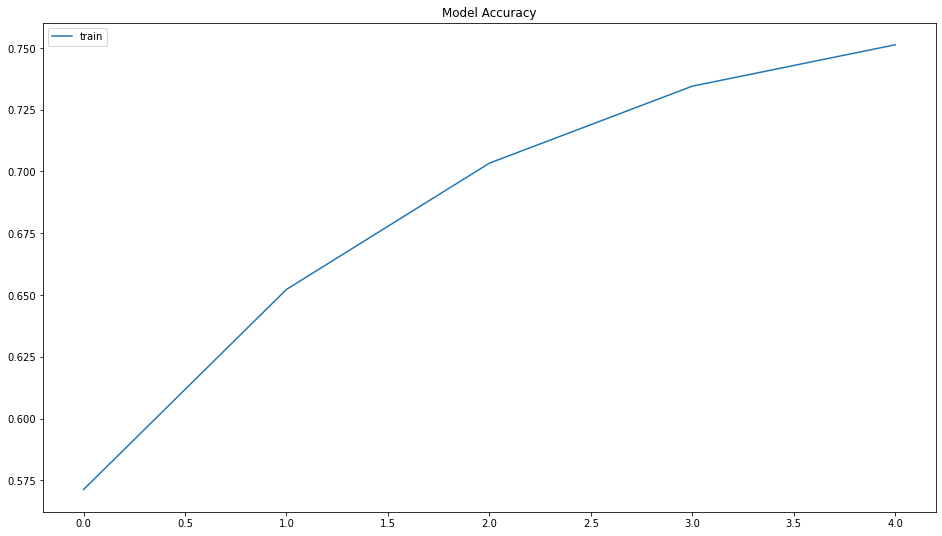

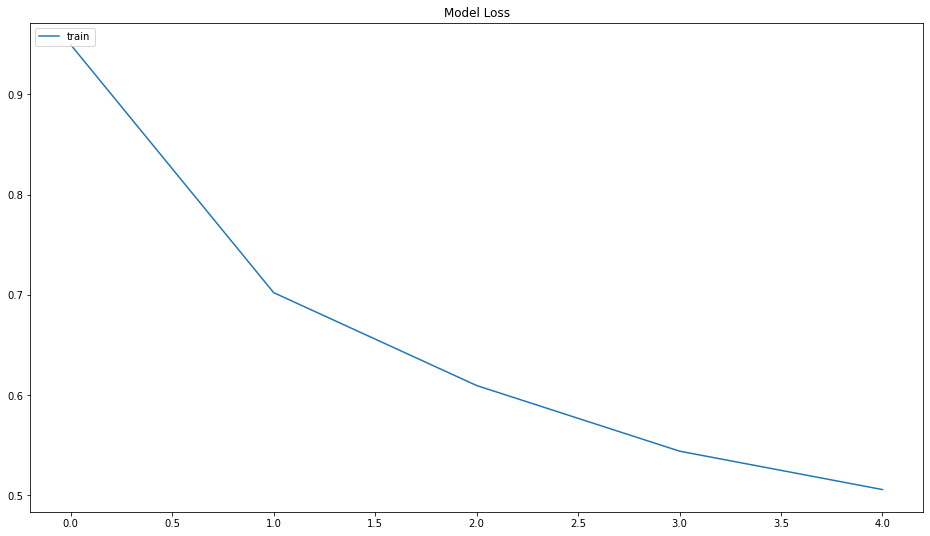

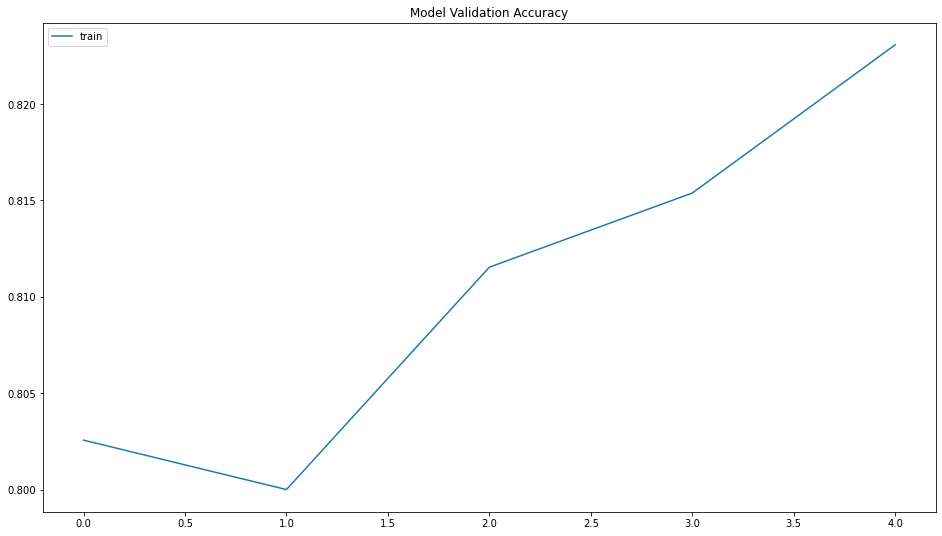

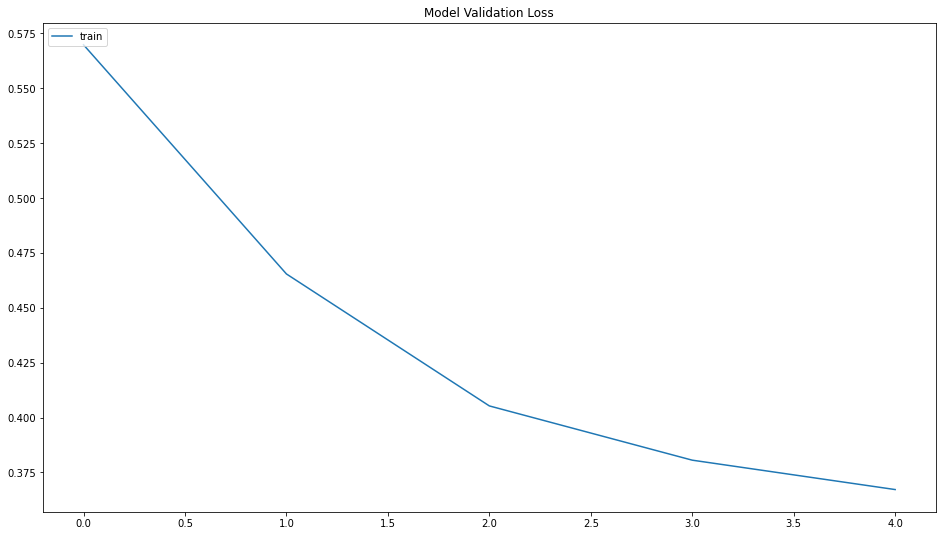

In [24]:
plt.figure(figsize=(16, 9))
plt.plot(history.epoch, history.history['accuracy'])
plt.title('Model Accuracy')
plt.legend(['train'], loc='upper left')
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(history.epoch, history.history['loss'])
plt.title('Model Loss')
plt.legend(['train'], loc='upper left')
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(history.epoch, history.history['val_accuracy'])
plt.title('Model Validation Accuracy')
plt.legend(['train'], loc='upper left')
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(history.epoch, history.history['val_loss'])
plt.title('Model Validation Loss')
plt.legend(['train'], loc='upper left')
plt.show()

In [47]:
X_testShape = X_test.shape[1]*X_test.shape[2]*X_test.shape[3]
X_testFlat = X_test.reshape(X_test.shape[0], X_testShape)
Y_test = y_test
from imblearn.over_sampling import SMOTE 
ros = SMOTE(sampling_strategy='minority')
X_testRos, Y_testRos = ros.fit_resample(X_testFlat, Y_test)
Y_testRosHot = to_categorical(Y_testRos, num_classes = 2)
#X_valRos, Y_valRos = ros.fit_resample(X_valFlat, Y_val)
for i in range(len(X_testRos)):
    height, width, channels = 150,150,3
    X_testRosReshaped = X_testRos.reshape(len(X_testRos),height,width,channels)
Y_testRosHot = to_categorical(Y_testRos, num_classes = 2)
X_test = X_testRosReshaped
y_test = Y_testRosHot

In [48]:
X_test.shape

(790, 150, 150, 3)

In [50]:
y_test.shape

(790, 2)

In [28]:
from sklearn.metrics import confusion_matrix
pred = vgg_model.predict(X_test)
pred = np.argmax(pred,axis = 1)
y_true = np.argmax(y_test,axis = 1)

In [30]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


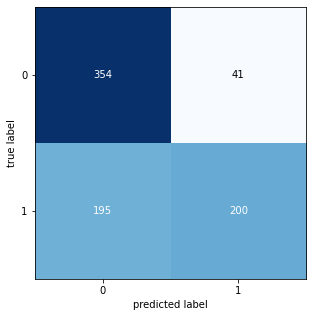

In [31]:

CM = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

In [133]:
from mlxtend.plotting import plot_confusion_matrix

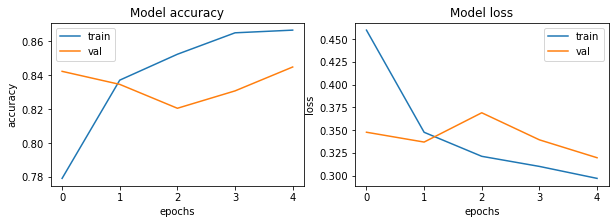

In [134]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])
     





In [59]:
tn, fp, fn, tp = CM.ravel()
preds = vgg_model.predict(X_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, np.round(preds))*100
#preds = vgg_model.predict(X_test)

In [76]:
from sklearn.metrics import accuracy_score
print('CONFUSION MATRIX ------------------')
print(CM)

print('\nTEST METRICS ----------------------')
precision = tp/(tp+fp)*100
recall = tp/(tp+fn)*100
f1 = 2*precision*recall/(precision+recall)
print('Accuracy:',acc)
print('Precision:',precision)
print('Recall: ',recall)
print('F1-score: ',f1)

print('\nTRAIN METRIC ----------------------')
print('Train acc: '.format(np.round((history.history['accuracy'][-1])*100, 2)))

CONFUSION MATRIX ------------------
[[354  41]
 [195 200]]

TEST METRICS ----------------------
Accuracy: 56.075949367088604
Precision: 82.98755186721992
Recall: {}% 50.63291139240506
F1-score: {} 62.89308176100629

TRAIN METRIC ----------------------
Train acc: 75.13


In [79]:
X_test = pickle.load(open(r'C:\Users\Computing\Downloads\data-task1-20220514T230241Z-001\data-task1\data-task1\X_test.pkl','rb'))
y_test = pickle.load(open(r'C:\Users\Computing\Downloads\data-task1-20220514T230241Z-001\data-task1\data-task1\Y_test.pkl','rb'))
X_test = X_test/ 255;
test_datagen.fit(X_test)
y_test = to_categorical(y_test, 2)

In [80]:
from sklearn.metrics import confusion_matrix
pred = vgg_model.predict(X_test)
pred = np.argmax(pred,axis = 1)
y_true = np.argmax(y_test,axis = 1)

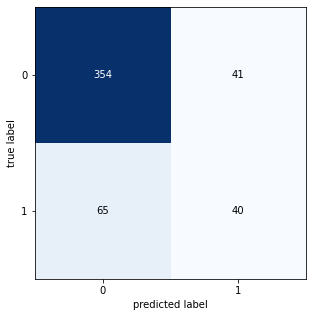

In [81]:

CM = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

In [82]:
from mlxtend.plotting import plot_confusion_matrix

In [83]:
tn, fp, fn, tp = CM.ravel()
preds = vgg_model.predict(X_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, np.round(preds))*100
#preds = vgg_model.predict(X_test)

In [84]:
from sklearn.metrics import accuracy_score
print('CONFUSION MATRIX ------------------')
print(CM)

print('\nTEST METRICS ----------------------')
precision = tp/(tp+fp)*100
recall = tp/(tp+fn)*100
f1 = 2*precision*recall/(precision+recall)
print('Accuracy:',acc)
print('Precision:',precision)
print('Recall: {}%',recall)
print('F1-score: {}',f1)

print('\nTRAIN METRIC ----------------------')
print('Train acc: {}'.format(np.round((history.history['accuracy'][-1])*100, 2)))

CONFUSION MATRIX ------------------
[[354  41]
 [ 65  40]]

TEST METRICS ----------------------
Accuracy: 67.2
Precision: 49.382716049382715
Recall: {}% 38.095238095238095
F1-score: {} 43.01075268817205

TRAIN METRIC ----------------------
Train acc: 75.13


In [85]:
model.save(r'C:\Users\Computing\Downloads/vgg_final_assessment.h5')